El dataset a analizar corresponde a la empresa “Surban S.A.”, dedicada al sector financiero. Este conjunto de datos incluye la nómina completa de sus empleados, abarcando tanto a aquellos que adoptaron el trabajo remoto como a los que continuaron con el trabajo presencial.

El objetivo principal de este análisis es evaluar el desempeño laboral de los empleados en las distintas sucursales y comparar estos resultados por género. Se busca comprender cómo ha variado el desempeño de los empleados entre los años 2022 y 2023, y si existen diferencias significativas entre sucursales y géneros.

A través de este análisis, se pretende identificar patrones y tendencias que puedan ser útiles para mejorar las políticas de desempeño y desarrollo profesional dentro de la empresa. Además, se espera proporcionar una visión integral del estado actual del desempeño laboral de la nómina, considerando tanto las áreas que adoptaron modalidades de trabajo innovadoras como aquellas que mantuvieron enfoques más tradicionales.


Importa librerias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Lectura de archivo

In [5]:
url = 'https://raw.githubusercontent.com/Soletorres/Proyecto_Parte1_Torres/main/Dataset%20Teletrabajo_prueba.csv?token=GHSAT0AAAAAACSZ5QDCWXXRCKOAK7LXNIP6ZSVB3IA'
df = pd.read_csv(url, index_col=0, encoding='latin1', delimiter=';')
print(df.head(5))

                    Cargo  Cd Pto         Sucursal                Zonal  \
Id                                                                        
7738655        AUXILIAR C    1733  28 DE NOVIEMBRE  ZONAL PATAGONIA SUR   
3291099  SUBJE CONTADURIA    1340  28 DE NOVIEMBRE  ZONAL PATAGONIA SUR   
3668354   GERENTE TERCERA    1314  28 DE NOVIEMBRE  ZONAL PATAGONIA SUR   
3430359       SUBTESORERO    1360  28 DE NOVIEMBRE  ZONAL PATAGONIA SUR   
2895141        AUXILIAR B    1732  28 DE NOVIEMBRE  ZONAL PATAGONIA SUR   

        Fecha Nacimiento  Edad Genero     Inicial  Antiguedad     F Cargo  \
Id                                                                          
7738655       10/11/1995    28     M   02/05/2018           5  01/10/2023   
3291099       05/02/1975    48     M   14/09/1999          24  05/12/2017   
3668354       06/06/1982    41     F   15/01/2007          17  19/07/2021   
3430359       02/07/1985    38     M   01/09/2004          19  05/12/2017   
2895141     

Análisis Exploratorio de Datos

In [6]:
df.head()


,Cargo,Cd Pto,Sucursal,Zonal,Fecha Nacimiento,Edad,Genero,Inicial,Antiguedad,F Cargo,...,Inasistencias 2022,Lic. Art 2022,Otras Lic 2022,Lic. Enfermedad 2023,Lic. maternidad/excedencia 2023,Inasistencias 2023,Lic. Art 2023,Otras Lic 2023,Conyuge/conviviente,Hija/o
Id,,,,,,,,,,,,,,,,,,,,,
7738655,AUXILIAR C,1733,28 DE NOVIEMBRE,ZONAL PATAGONIA SUR,10/11/1995,28,M,02/05/2018,5,01/10/2023,...,0,0,0,0,0,0,0,0,0,1
3291099,SUBJE CONTADURIA,1340,28 DE NOVIEMBRE,ZONAL PATAGONIA SUR,05/02/1975,48,M,14/09/1999,24,05/12/2017,...,0,0,0,0,0,0,0,0,1,2
3668354,GERENTE TERCERA,1314,28 DE NOVIEMBRE,ZONAL PATAGONIA SUR,06/06/1982,41,F,15/01/2007,17,19/07/2021,...,0,0,0,3,0,0,0,0,1,2
3430359,SUBTESORERO,1360,28 DE NOVIEMBRE,ZONAL PATAGONIA SUR,02/07/1985,38,M,01/09/2004,19,05/12/2017,...,0,0,0,15,0,0,0,0,1,2
2895141,AUXILIAR B,1732,28 DE NOVIEMBRE,ZONAL PATAGONIA SUR,18/01/1992,32,F,05/05/2014,9,01/10/2022,...,0,0,0,1,92,0,0,0,1,3


In [7]:
df.shape

(19827, 24)

In [8]:
df.describe()

,Cd Pto,Edad,Antiguedad,Evaluacion 2022,Evaluacion 2023,Lic. Enfermedad 2022,Lic. maternidad/excedencia 2022,Inasistencias 2022,Lic. Art 2022,Otras Lic 2022,Lic. Enfermedad 2023,Lic. maternidad/excedencia 2023,Inasistencias 2023,Lic. Art 2023,Otras Lic 2023,Conyuge/conviviente,Hija/o
count,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000,19827.000000
mean,1801.054976,43.986786,18.473042,3.889393,3.624351,6.446058,2.449589,0.027488,0.385484,0.801987,8.802492,1.451758,0.063802,0.300096,1.417058,0.517123,1.105967
std,1094.890952,12.066706,12.723297,1.748635,1.660238,24.813946,18.584183,0.911056,6.250031,11.845679,33.728201,13.572337,2.190171,5.267592,18.124382,0.499719,1.194501
min,10.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1340.000000,34.000000,8.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1721.000000,42.000000,16.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1732.000000,53.000000,29.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,9770.000000,80.000000,53.000000,6.000000,6.000000,363.000000,273.000000,78.000000,335.000000,352.000000,365.000000,275.000000,150.000000,292.000000,365.000000,1.000000,10.000000


In [9]:
missing_values = df.isna().sum()

zero_values = (df == 0).sum()

print("Valores faltantes en cada columna:")
print(missing_values)
print("\nValores iguales a 0 en cada columna:")
print(zero_values)


Valores faltantes en cada columna:
Cargo                                 0
Cd Pto                                0
Sucursal                              0
Zonal                                 0
Fecha Nacimiento                      0
Edad                                  0
Genero                                0
Inicial                               0
Antiguedad                            0
F Cargo                            2406
Evaluacion 2022                       0
Evaluacion 2023                       0
Lic. Enfermedad 2022                  0
Lic. maternidad/excedencia 2022       0
Inasistencias 2022                    0
Lic. Art 2022                         0
Otras Lic 2022                        0
Lic. Enfermedad 2023                  0
Lic. maternidad/excedencia 2023       0
Inasistencias 2023                    0
Lic. Art 2023                         0
Otras Lic 2023                        0
Conyuge/conviviente                   0
Hija/o                                0
dtype

1-La distribución de fechas de ingreso de los empleados en la empresa muestra un aumento significativo en las contrataciones durante ciertos periodos del año, lo que sugiere una estrategia de contratación estacional.

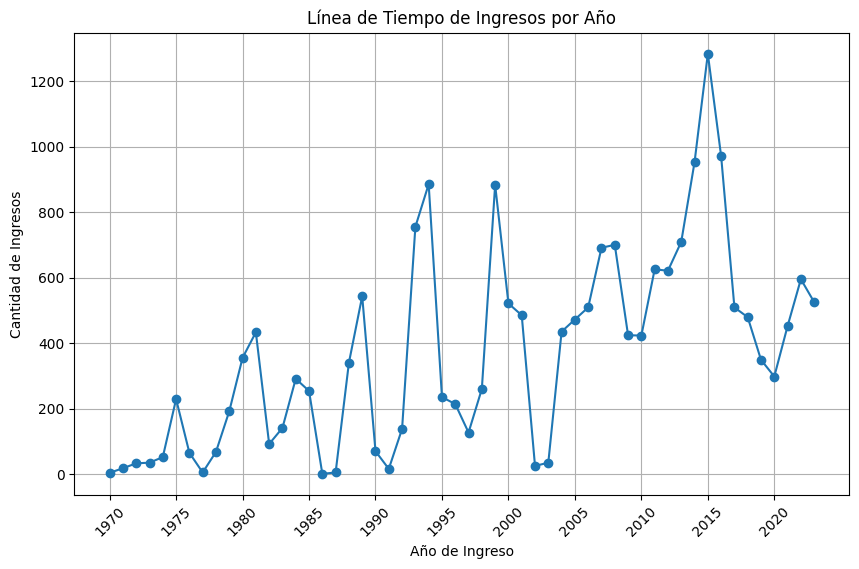

In [10]:
df['Inicial'] = pd.to_datetime(df['Inicial'], format='%d/%m/%Y', errors='coerce')
data_valid_dates = df.dropna(subset=['Inicial'])
data_valid_dates['Año de Ingreso'] = data_valid_dates['Inicial'].dt.year
ingresos_por_año = data_valid_dates['Año de Ingreso'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(ingresos_por_año.index, ingresos_por_año.values, marker='o', linestyle='-')

plt.xlabel('Año de Ingreso')
plt.ylabel('Cantidad de Ingresos')
plt.title('Línea de Tiempo de Ingresos por Año')

years = ingresos_por_año.index
plt.xticks(ticks=years[::5], rotation=45)

plt.grid(True)
plt.show()

<ipython-input-11-01bd07bdf590>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mes_Ingreso', data=df, palette='Set2')


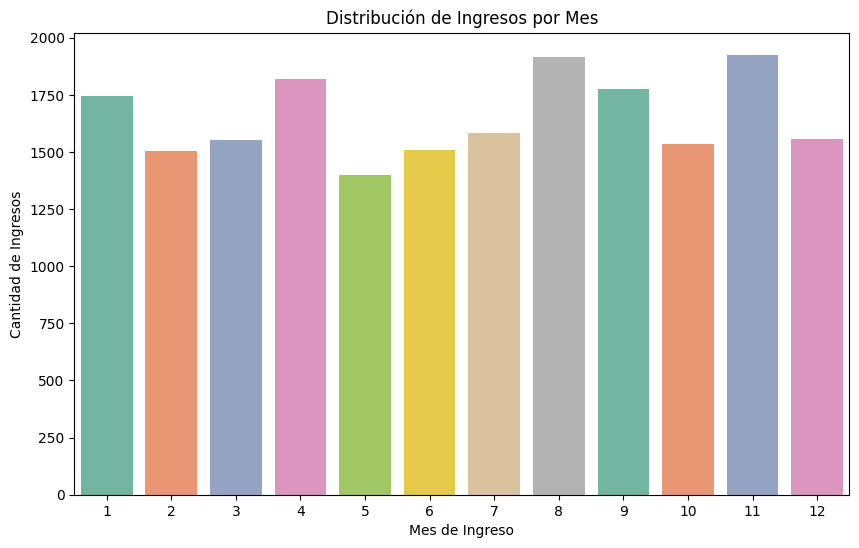

In [11]:
df['Inicial'] = pd.to_datetime(df['Inicial'], errors='coerce')
df['Año_Ingreso'] = df['Inicial'].dt.year
df['Mes_Ingreso'] = df['Inicial'].dt.month

ingresos_por_mes = df.groupby(['Año_Ingreso', 'Mes_Ingreso']).size().reset_index(name='Count')

ingresos_pivot = ingresos_por_mes.pivot(index='Año_Ingreso', columns='Mes_Ingreso', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.countplot(x='Mes_Ingreso', data=df, palette='Set2')
plt.title('Distribución de Ingresos por Mes')
plt.xlabel('Mes de Ingreso')
plt.ylabel('Cantidad de Ingresos')
plt.show()

Al examinar los datos de ingreso por año y mes, no se observan picos significativos en las contrataciones que indiquen una planificación estacional o específica durante ciertos periodos del año. Si se observan 3 picos en la linea temporal, que coinciden con programas de retiros voluntarios implementados. lo que sugiere que 'Surban S.A.' ha incrementado las contrataciones en respuesta a estas iniciativas. Esto indica que la empresa ha utilizado los retiros voluntarios como una oportunidad para renovar su fuerza laboral.

2-Existe una diferencia significativa en la cantidad de licencias tomadas y las cargas de familia entre los géneros, lo que podría influir en el equilibrio entre la vida laboral y personal de los empleados de Surban S.A.

<ipython-input-12-c6852b15fc22>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Genero', y='Licencias_2022', data=licencias_por_genero_2022, palette='Set2')
<ipython-input-12-c6852b15fc22>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Genero', y='Licencias_2023', data=licencias_por_genero_2023, palette='Set2')


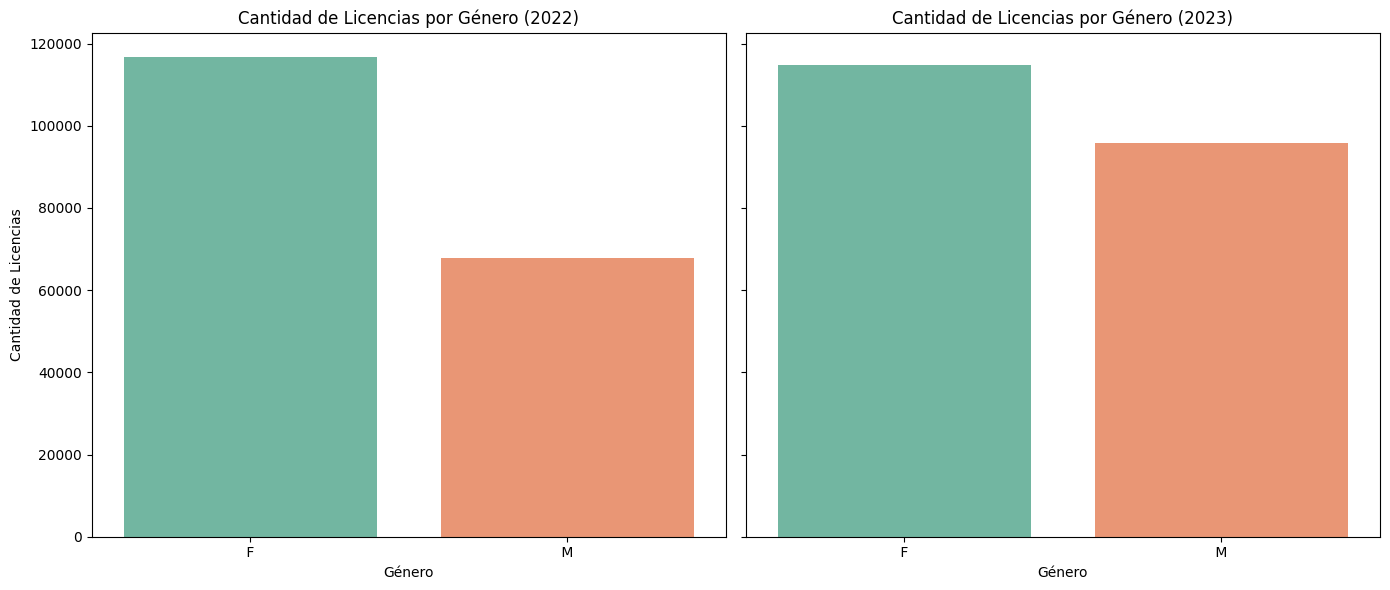

In [12]:

df['Licencias_2022'] = df[['Lic. Enfermedad 2022', 'Lic. maternidad/excedencia 2022', 'Inasistencias 2022', 'Lic. Art 2022']].sum(axis=1)
df['Licencias_2023'] = df[['Lic. Enfermedad 2023', 'Lic. maternidad/excedencia 2023', 'Inasistencias 2023', 'Lic. Art 2023']].sum(axis=1)


licencias_por_genero_2022 = df.groupby('Genero')['Licencias_2022'].sum().reset_index()
licencias_por_genero_2023 = df.groupby('Genero')['Licencias_2023'].sum().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


sns.barplot(ax=axes[0], x='Genero', y='Licencias_2022', data=licencias_por_genero_2022, palette='Set2')
axes[0].set_title('Cantidad de Licencias por Género (2022)')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Cantidad de Licencias')

sns.barplot(ax=axes[1], x='Genero', y='Licencias_2023', data=licencias_por_genero_2023, palette='Set2')
axes[1].set_title('Cantidad de Licencias por Género (2023)')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('Cantidad de Licencias')


plt.tight_layout()


plt.show()

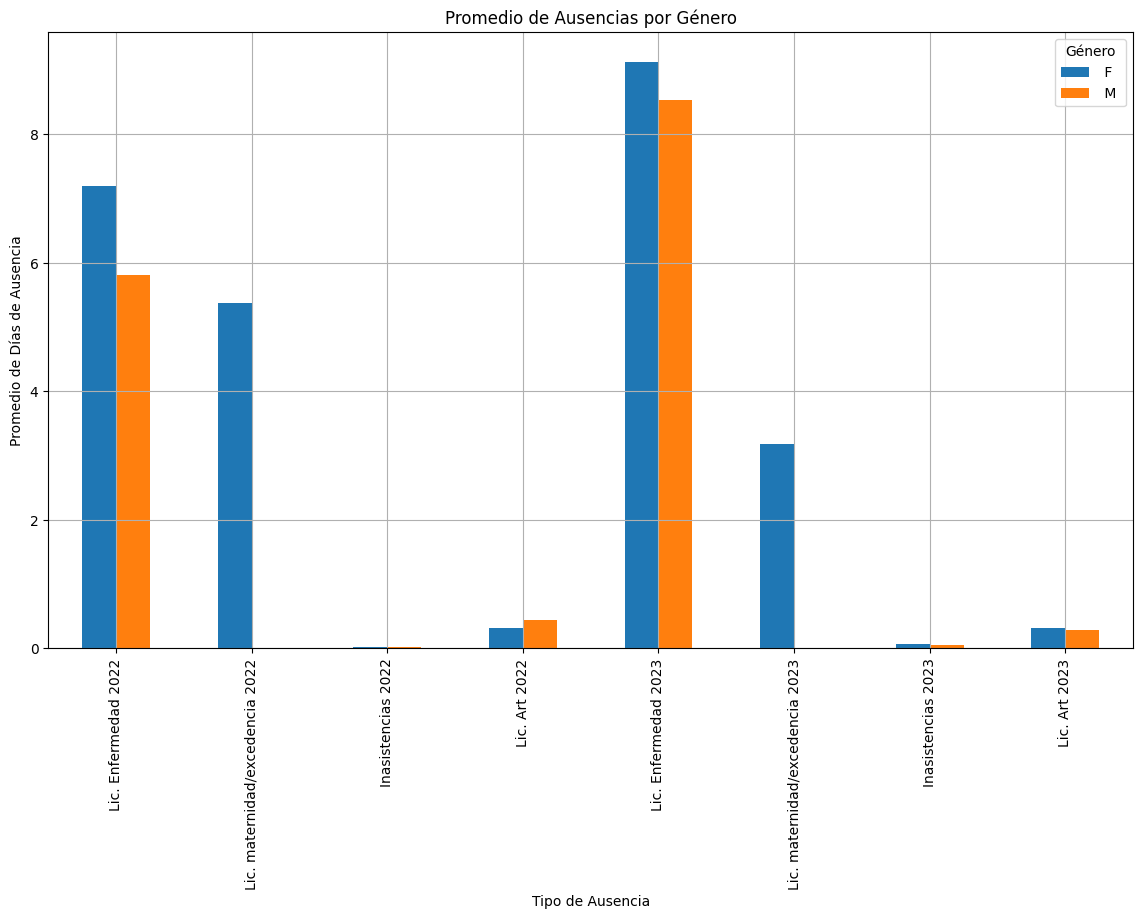

In [13]:
ausencias = ['Lic. Enfermedad 2022', 'Lic. maternidad/excedencia 2022', 'Inasistencias 2022',
                     'Lic. Art 2022', 'Lic. Enfermedad 2023',
                     'Lic. maternidad/excedencia 2023', 'Inasistencias 2023', 'Lic. Art 2023']

# Asegurarse de que las columnas de ausencias sean numéricas
for col in ausencias:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular las ausencias promedio por género
ausencias_genero = df.groupby('Genero')[ausencias].mean()

# Crear un gráfico de barras para visualizar las ausencias promedio por género
ausencias_genero.T.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Tipo de Ausencia')
plt.ylabel('Promedio de Días de Ausencia')
plt.title('Promedio de Ausencias por Género')
plt.xticks(rotation=90)
plt.legend(title='Género')
plt.grid(True)
plt.show()



<ipython-input-14-80973c551941>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Genero', y='Cargas_de_Familia_Total', data=df, palette='Set3')


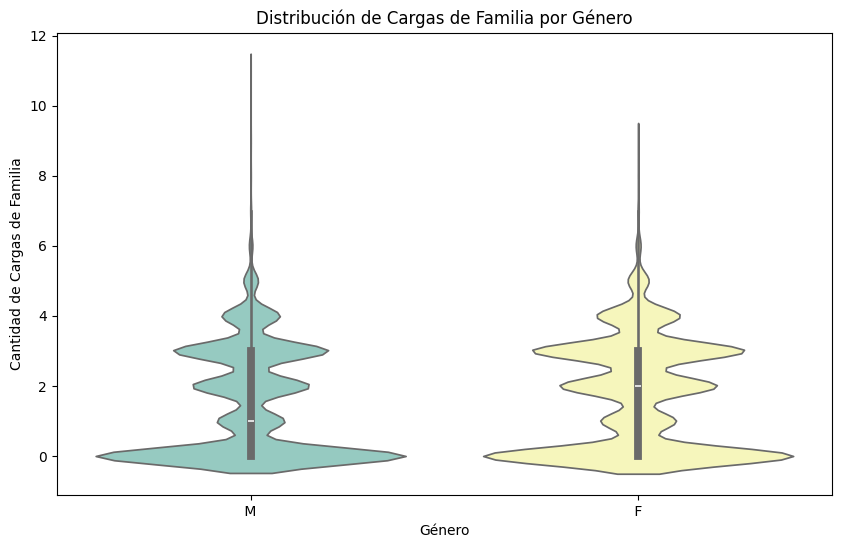

In [14]:
df['Cargas_de_Familia_Total'] = df[['Conyuge/conviviente', 'Hija/o']].sum(axis=1)


plt.figure(figsize=(10, 6))
sns.violinplot(x='Genero', y='Cargas_de_Familia_Total', data=df, palette='Set3')
plt.title('Distribución de Cargas de Familia por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Cargas de Familia')
plt.show()

<ipython-input-15-62e6a57f470b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genero', y='Cargas_de_Familia_Total', data=df, palette='Set3')


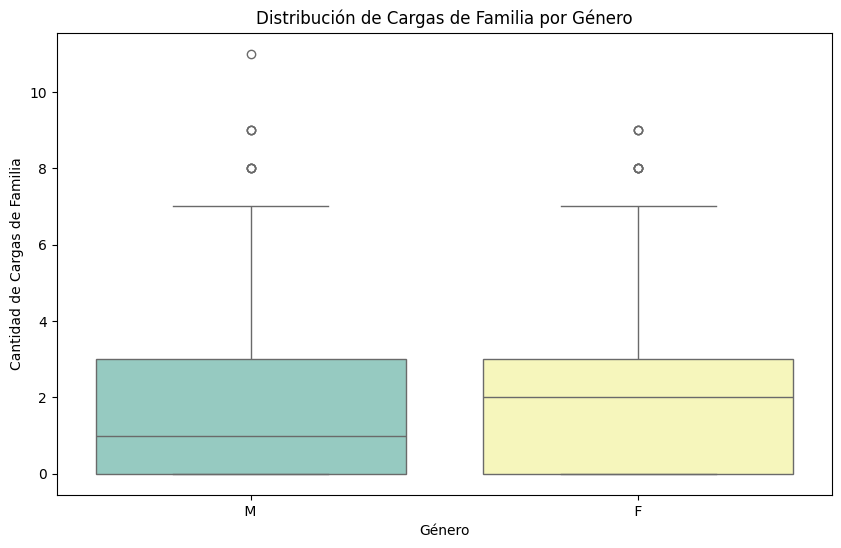

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Cargas_de_Familia_Total', data=df, palette='Set3')
plt.title('Distribución de Cargas de Familia por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Cargas de Familia')
plt.show()

Estas diferencias en las licencias y las cargas de familia sugieren que las empleadas de 'Surban S.A.' enfrentan mayores responsabilidades familiares, lo que podría influir en su necesidad de tomar más licencias. Esto puede afectar su equilibrio entre la vida laboral y personal y podría estar relacionado con las políticas de la empresa y el apoyo ofrecido a los empleados. Cabe destacar que la mayor diferencia que se observa en las licencias por genero correspode a licencias por maternidad.

3 - No hay diferencia significativa en las tasas de ascensos entre hombres y mujeres

  Genero  Cantidad_Ascensos
0     F                7836
1     M                9585


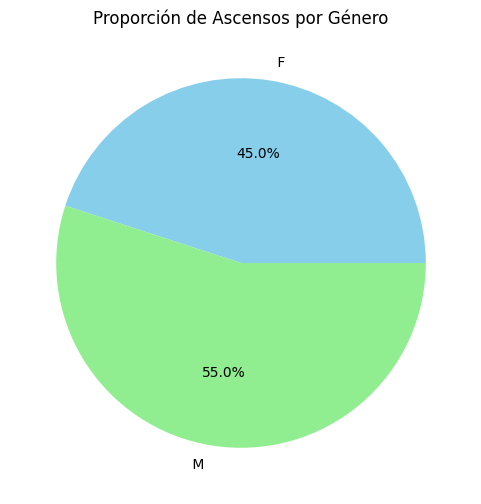

In [24]:
df['Ascenso'] = df['F Cargo'].notnull()
# Agrupar por género y calcular la cantidad de ascensos
ascensos_por_genero = df.groupby('Genero')['Ascenso'].sum().reset_index()

# Renombrar la columna para mayor claridad
ascensos_por_genero.columns = ['Genero', 'Cantidad_Ascensos']
print(ascensos_por_genero)

# Gráfico de torta para ascensos por género
plt.figure(figsize=(6, 6))
plt.pie(ascensos_por_genero['Cantidad_Ascensos'], labels=ascensos_por_genero['Genero'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proporción de Ascensos por Género')
plt.show()

In [23]:
Total_mujeres = df[df['Genero'] == 'F'].shape[0]
print(Total_mujeres)

0


In [21]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Calcular el número total de mujeres y hombres
Total_mujeres = df[df['Genero'] == 'F'].shape[0]
Total_hombres = df[df['Genero'] == 'M'].shape[0]

# Calcular el número de ascensos para mujeres y hombres
ascensos_mujeres = df[(df['Genero'] == 'F') & (df['Ascenso'])].shape[0]
ascensos_hombres = df[(df['Genero'] == 'M') & (df['Ascenso'])].shape[0]

print(f"Número de mujeres: {Total_mujeres}, Número de hombres: {Total_hombres}")
print(f"Ascensos mujeres: {ascensos_mujeres}, Ascensos hombres: {ascensos_hombres}")

# Calcular las proporciones de ascensos
p1 = ascensos_mujeres / Total_mujeres
p2 = ascensos_hombres / Total_hombres

counts = np.array([ascensos_mujeres, ascensos_hombres])
nobs = np.array([Total_mujeres, Total_hombres])

# Realizar el test de proporciones z
stat, pval = proportions_ztest(counts, nobs)

print(f'Valor p: {pval:.4f}')

Número de mujeres: 0, Número de hombres: 0
Ascensos mujeres: 0, Ascensos hombres: 0


ZeroDivisionError: division by zero

Esto sugiere que las políticas o prácticas dentro de la organización podrían estar favoreciendo a un género sobre el otro en términos de ascensos. Específicamente, los datos muestran que tanto hombres como mujeres están recibiendo ascensos, pero la distribución no es igual, y esta desigualdad es lo suficientemente significativa como para no ser atribuida al azar.

4-Los empleados con mayor antigüedad tienen más probabilidades de recibir un ascenso.

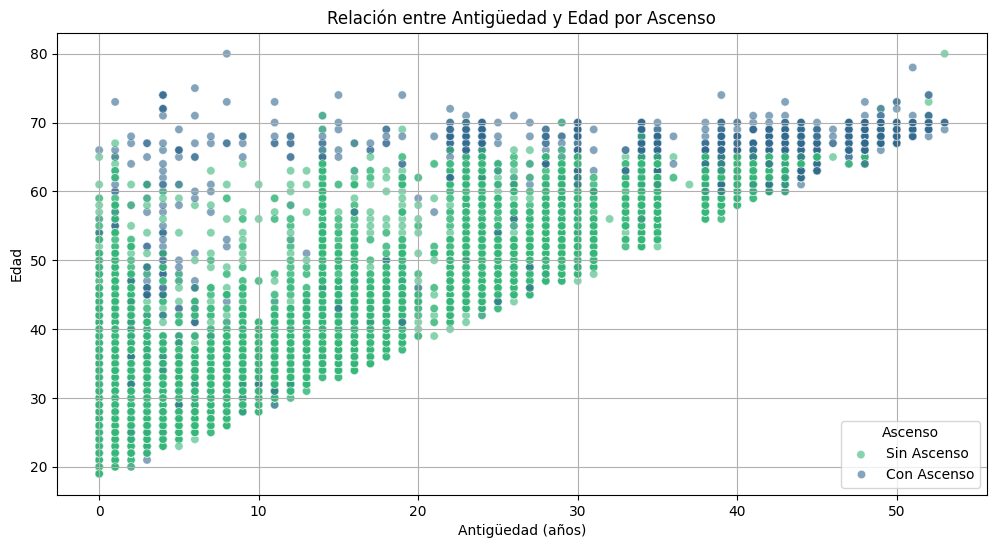

In [227]:

df['Ascenso'] = df['F Cargo'].notnull()

df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Antiguedad'] = pd.to_numeric(df['Antiguedad'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Antiguedad', y='Edad', hue='Ascenso', palette='viridis', alpha=0.6)
plt.xlabel('Antigüedad (años)')
plt.ylabel('Edad')
plt.title('Relación entre Antigüedad y Edad por Ascenso')
plt.legend(title='Ascenso', labels=['Sin Ascenso', 'Con Ascenso'])
plt.grid(True)
plt.show()

Se observa en el grafico que hay una alta relacion entre la antiguedad y la edad con relacion a los ascensos

5- En el año 2023 se produjo una modificacion en los parametros de las evaluaciones de los empleados, que produjo una baja en los promedios de estas.

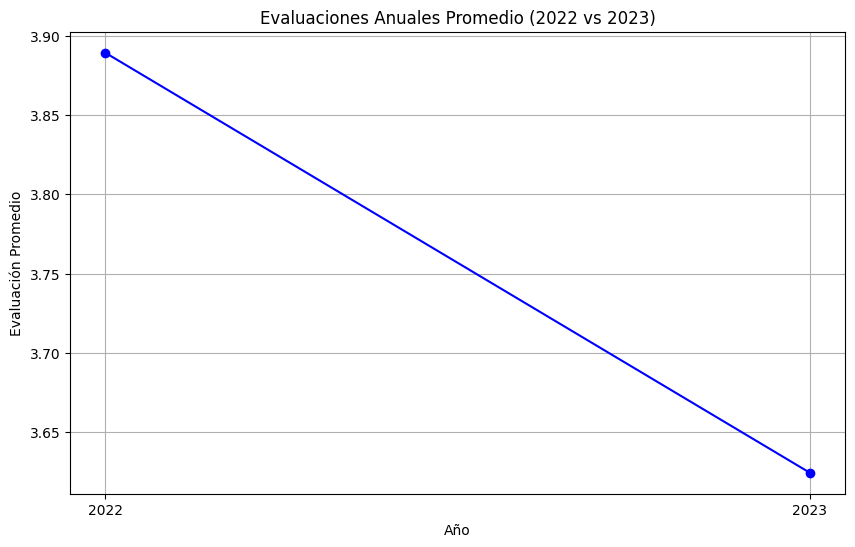

In [244]:
df['Evaluacion 2022'] = pd.to_numeric(df['Evaluacion 2022'], errors='coerce')
df['Evaluacion 2023'] = pd.to_numeric(df['Evaluacion 2023'], errors='coerce')


evaluacion_2022_mean = df['Evaluacion 2022'].mean()
evaluacion_2023_mean = df['Evaluacion 2023'].mean()

evaluaciones = pd.DataFrame({
    'Año': [2022, 2023],
    'Evaluación Promedio': [evaluacion_2022_mean, evaluacion_2023_mean]
})


plt.figure(figsize=(10, 6))
plt.plot(evaluaciones['Año'], evaluaciones['Evaluación Promedio'], marker='o', linestyle='-', color='blue')
plt.xlabel('Año')
plt.ylabel('Evaluación Promedio')
plt.xticks([2022, 2023])
plt.title('Evaluaciones Anuales Promedio (2022 vs 2023)')
plt.grid(True)
plt.show()

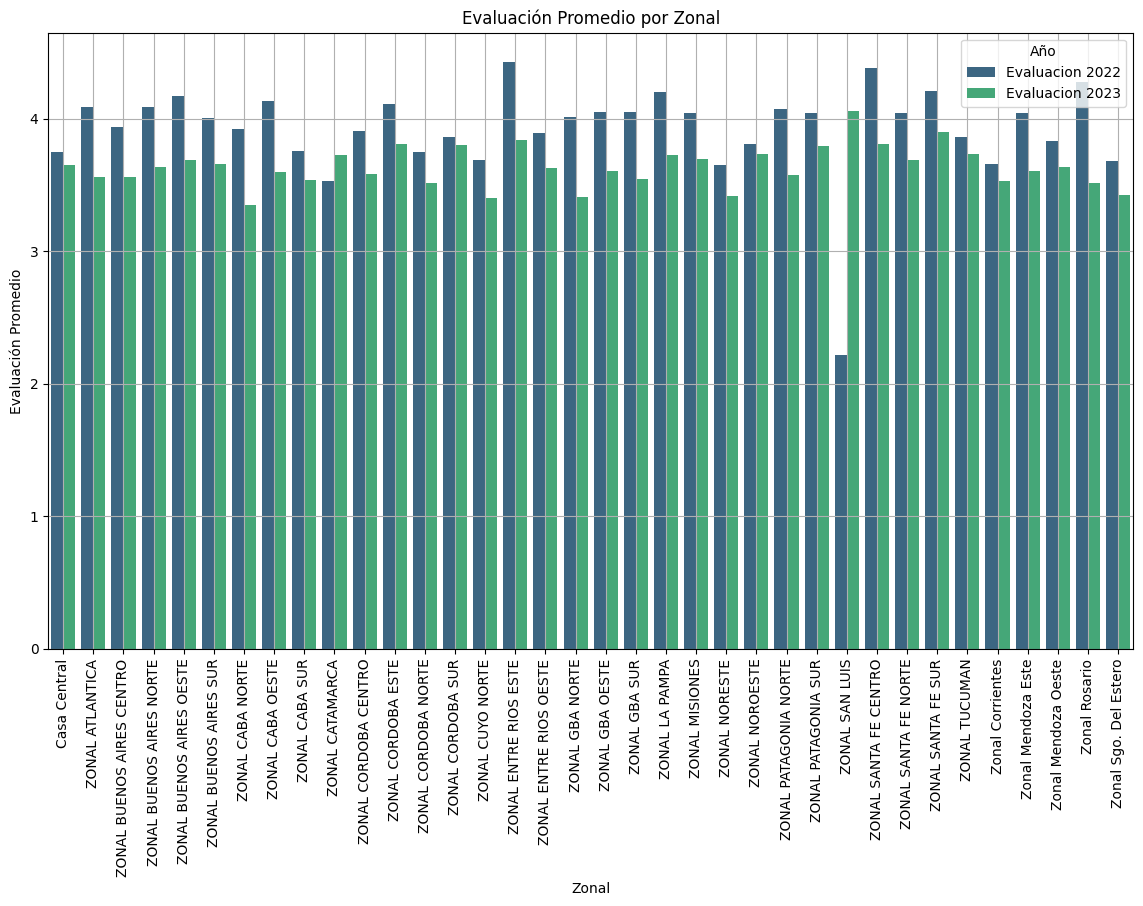

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df['Evaluacion 2022'] = pd.to_numeric(df['Evaluacion 2022'], errors='coerce')
df['Evaluacion 2023'] = pd.to_numeric(df['Evaluacion 2023'], errors='coerce')

evaluacion_promedio_zonal = df.groupby('Zonal')[['Evaluacion 2022', 'Evaluacion 2023']].mean().reset_index()


evaluacion_promedio_zonal_long = evaluacion_promedio_zonal.melt(id_vars='Zonal', var_name='Año', value_name='Evaluación Promedio')


plt.figure(figsize=(14, 8))
sns.barplot(data=evaluacion_promedio_zonal_long, x='Zonal', y='Evaluación Promedio', hue='Año', palette='viridis')
plt.xlabel('Zonal')
plt.ylabel('Evaluación Promedio')
plt.title('Evaluación Promedio por Zonal')
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.grid(True)
plt.show()

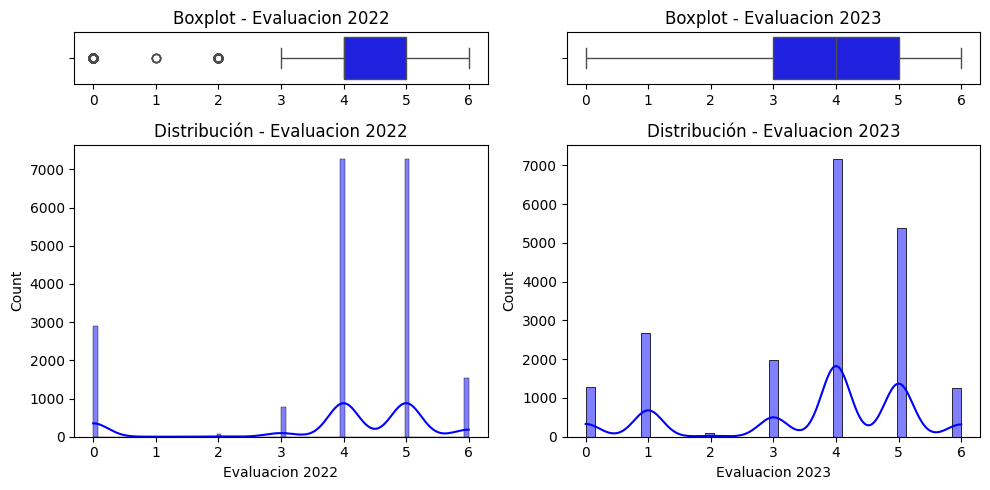

In [257]:
columns = ['Evaluacion 2022', 'Evaluacion 2023']
num_variables = len(columns)


fig = plt.figure(figsize=(5 * num_variables, 5))
grid = plt.GridSpec(2, num_variables, height_ratios=[0.15, 0.85])

color = 'blue'


for i, column in enumerate(columns):

    ax_box = plt.subplot(grid[0, i])
    sns.boxplot(x=df[column], ax=ax_box, color=color)
    ax_box.set_xlabel('')

    ax_hist = plt.subplot(grid[1, i], sharex=ax_box)
    sns.histplot(df[column], ax=ax_hist, color=color, kde=True)


    ax_box.set_title(f'Boxplot - {column}')
    ax_hist.set_title(f'Distribución - {column}')


plt.tight_layout()

plt.show()

El análisis de las evaluaciones de desempeño entre 2022 y 2023 revela una baja en los promedios de las evaluaciones en 2023 en comparación con 2022. Este descenso en las evaluaciones se distribuye de manera homogénea a través de las diferentes zonas del país, con la excepción de la zonal San Luis, donde se observó un comportamiento diferente.

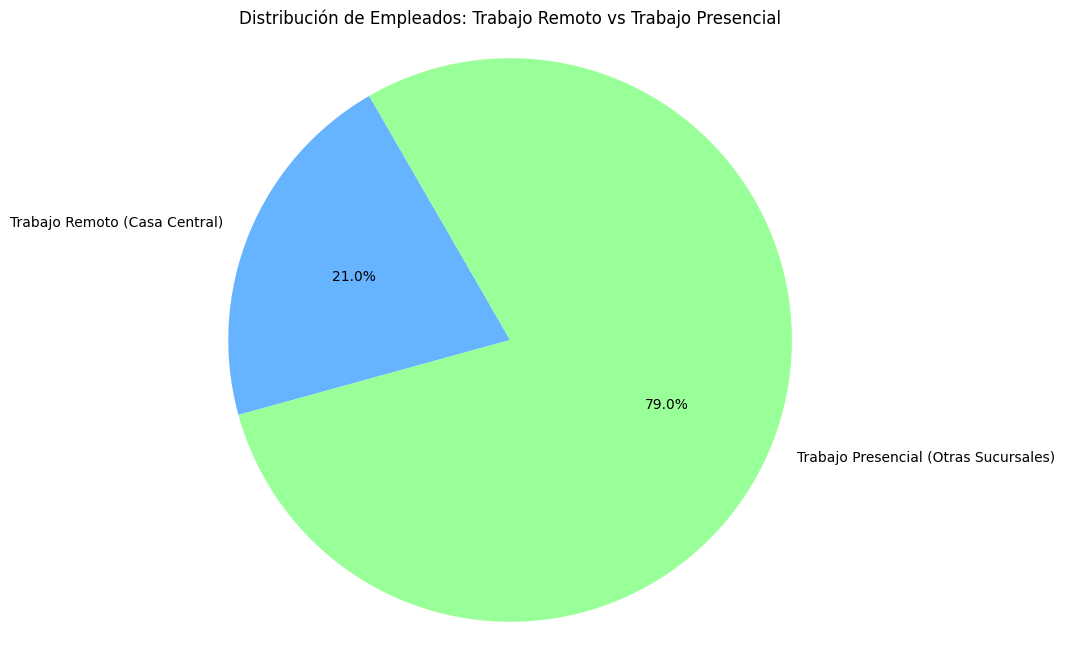

In [232]:

# Contar la cantidad de empleados de la sucursal "Casa Central" y el resto
central_count = df[df['Sucursal'] == 'Casa Central'].shape[0]
resto_count = df[df['Sucursal'] != 'Casa Central'].shape[0]

# Crear los datos para el gráfico de torta
labels = ['Trabajo Remoto (Casa Central)', 'Trabajo Presencial (Otras Sucursales)']
sizes = [central_count, resto_count]
colors = ['#66b3ff', '#99ff99']
explode = (0.0, 0)  # Explode the first slice

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120)
plt.title('Distribución de Empleados: Trabajo Remoto vs Trabajo Presencial')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

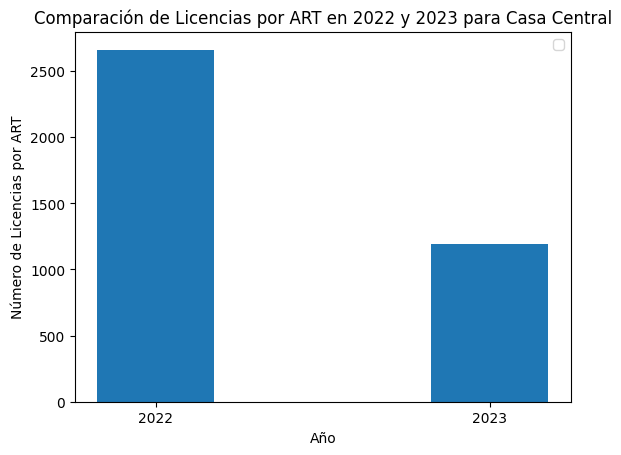

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df_casa_central = df[df['Sucursal'] == 'Casa Central']

licencias_art_2022_casa_central = df_casa_central['Lic. Art 2022']
licencias_art_2023_casa_central = df_casa_central['Lic. Art 2023']

total_licencias_2022_casa_central = licencias_art_2022_casa_central.sum()
total_licencias_2023_casa_central = licencias_art_2023_casa_central.sum()

fig, ax = plt.subplots()
bar_width = 0.35
index = [0, 1]

bars = ax.bar(index, [total_licencias_2022_casa_central, total_licencias_2023_casa_central], bar_width)

ax.set_xlabel('Año')
ax.set_ylabel('Número de Licencias por ART')
ax.set_title('Comparación de Licencias por ART en 2022 y 2023 para Casa Central')
ax.set_xticks(index)
ax.set_xticklabels(['2022', '2023'])
ax.legend()

plt.show()

Se observa una disminucion significativa en el total de licencias por Art, en comparacion al año 2022.

Graficos Adicionales

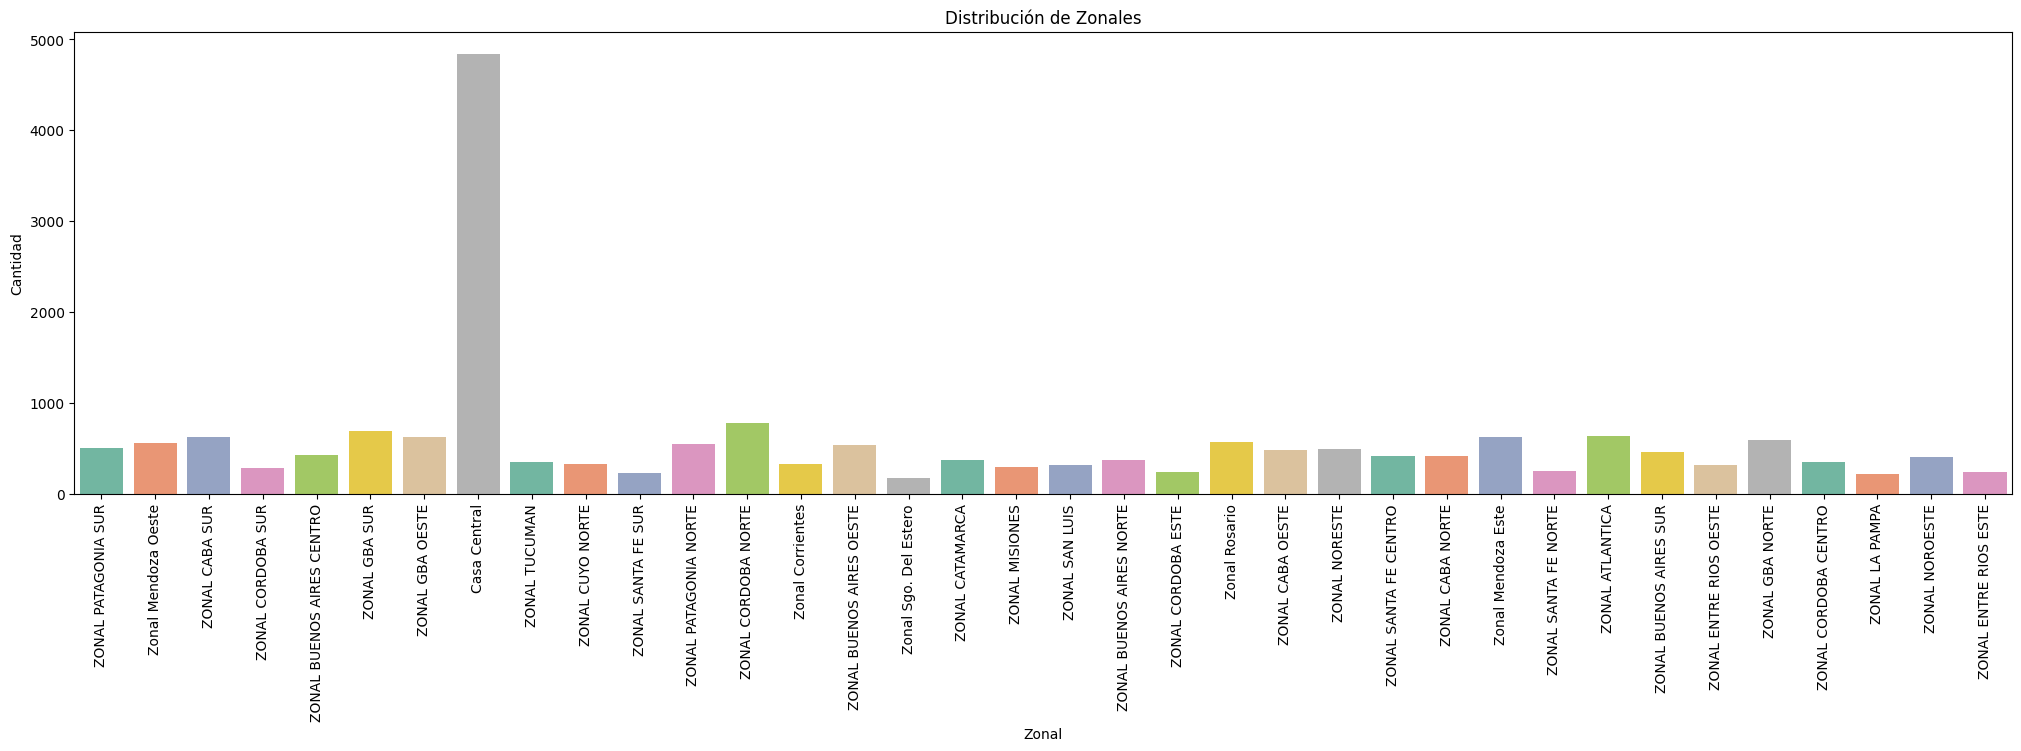

In [233]:
plt.figure(figsize=(25, 6))
sns.countplot(x='Zonal', data=df, palette='Set2', hue='Zonal', dodge=False)
plt.title('Distribución de Zonales')
plt.xlabel('Zonal')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)

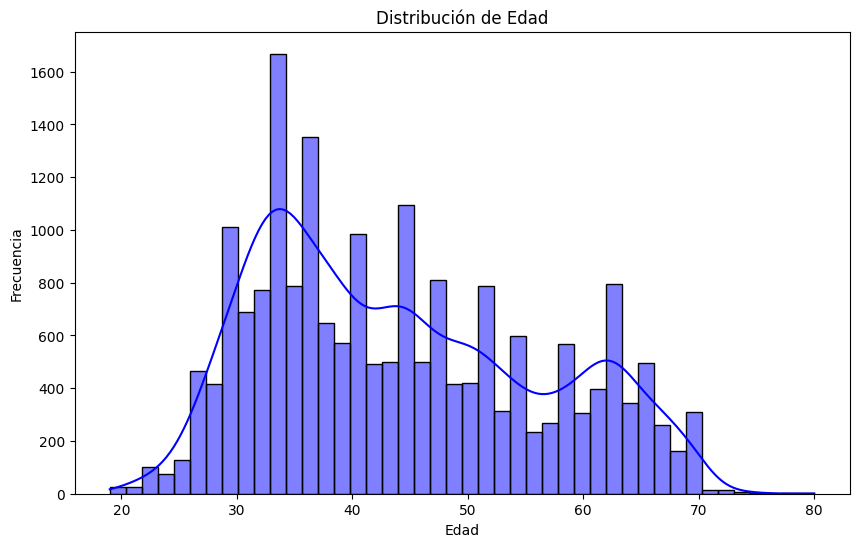

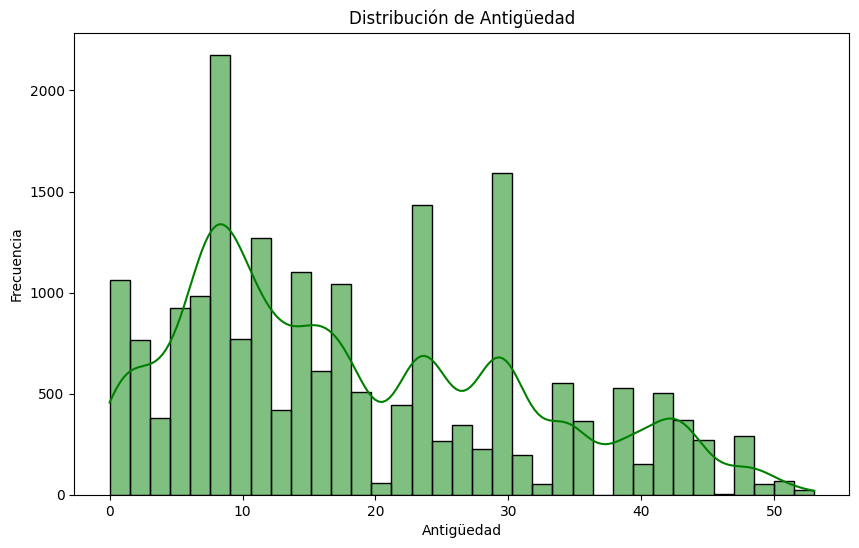

In [26]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], kde=True, color='blue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Antiguedad'], kde=True, color='green')
plt.title('Distribución de Antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Frecuencia')
plt.show()